In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline as inline
import matplotlib.ticker as mticker
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report 
import ipywidgets as widgets
from IPython.display import display
#%matplotlib inline


In [21]:
#Dataset was split in a way that was unblanced, all customers that were on a monthly subscription were churned in the training dataset. Will combine and split later for more reflective model
df= pd.concat([pd.read_csv("https://raw.githubusercontent.com/Rdmwebber/customer-churn-dataset/refs/heads/main/customer_churn_dataset-training-master.csv"),pd.read_csv("https://raw.githubusercontent.com/Rdmwebber/customer-churn-dataset/refs/heads/main/customer_churn_dataset-testing-master.csv")], axis = 0)
df.reset_index(drop=True, inplace=True)


In [22]:
df.drop(columns = 'CustomerID', inplace=True)

In [23]:
#Checking data set for null values
df.isnull().sum();

In [24]:
df[df.isna().any(axis=1)];

In [25]:
df.dropna(inplace=True)

In [26]:
df.isnull().sum();

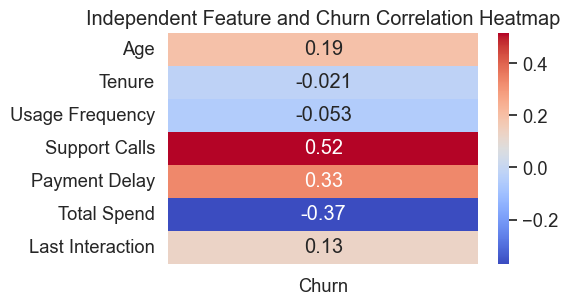

In [27]:
#featureCorrelation = df.select_dtypes(include=['number']).corr().loc[: 'Last Interaction', 'Churn']

#plt.figure(figsize=(5,3))
#sns.set(font_scale=1.2)
#sns.heatmap(featureCorrelation.to_frame(), annot=True, cmap="coolwarm", cbar=True)

#plt.title("Independent Feature and Churn Correlation Heatmap")

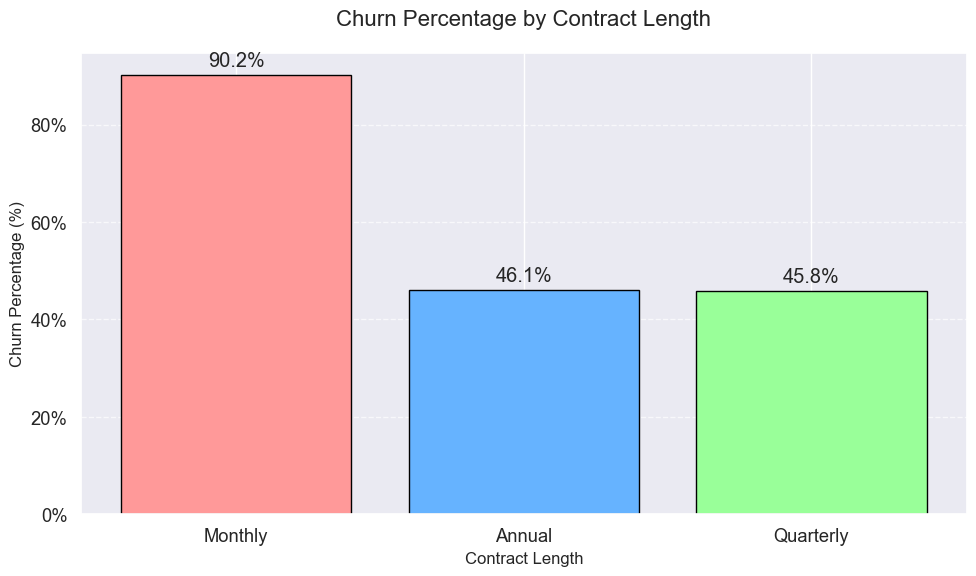

In [28]:
#churn_rate_contract = df.groupby('Contract Length')['Churn'].mean().sort_values(ascending=False) * 100

# Set up the plot
#fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart
#colors = ['#ff9999','#66b3ff','#99ff99']
#bars = ax.bar(churn_rate_contract.index, churn_rate_contract.values, color=colors, edgecolor='black')

# Add labels and a title for clarity
#ax.set_title('Churn Percentage by Contract Length', fontsize=16, pad=20)
#ax.set_xlabel('Contract Length', fontsize=12)
#ax.set_ylabel('Churn Percentage (%)', fontsize=12)

# Format the y-axis to display percentages
#ax.yaxis.set_major_formatter(mticker.PercentFormatter())

#for bar in bars:
   # yval = bar.get_height()
    #ax.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')

#ax.grid(axis='y', linestyle='--', alpha=0.7)

#plt.tight_layout();

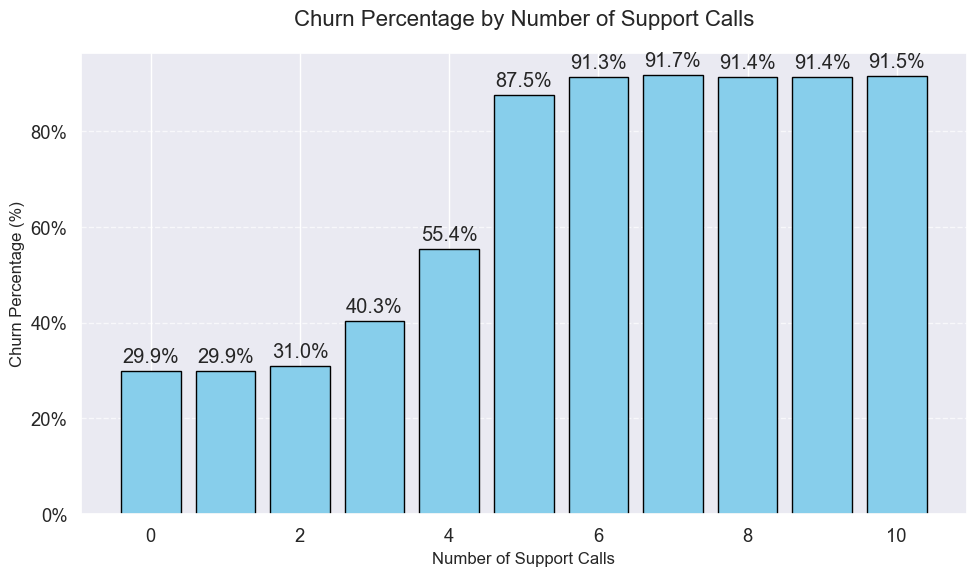

In [29]:
#churn_rate = df.groupby('Support Calls')['Churn'].mean() * 100

#fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart
#bars = ax.bar(churn_rate.index, churn_rate.values, color='skyblue', edgecolor='black')

# Add labels and a title for clarity
#ax.set_title('Churn Percentage by Number of Support Calls', fontsize=16, pad=20)
#ax.set_xlabel('Number of Support Calls', fontsize=12)
#ax.set_ylabel('Churn Percentage (%)', fontsize=12)

# Format the y-axis to display percentages
#ax.yaxis.set_major_formatter(mticker.PercentFormatter())

# Set the x-axis to only use integers, since you can't have half a support call
#ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# Add the percentage value on top of each bar for better readability
#for bar in bars:
    #yval = bar.get_height()
    #ax.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f'{yval:.1f}%', ha='center', va='bottom')
#ax.grid(axis='y', linestyle='--', alpha=0.7)
#plt.tight_layout();


In [30]:
def categoricalVariableCleaning(dataFrame):

# Converting categorical columns to boolean values
# Dropping first column (FEMALE) to avoid multicollinearity 
    gender = pd.get_dummies(dataFrame['Gender'], drop_first=True)
    subscription = pd.get_dummies(dataFrame['Subscription Type'])
    contractLength = pd.get_dummies(dataFrame['Contract Length'])
    dataFrame = pd.concat([dataFrame,gender,subscription,contractLength], axis=1)
    dataFrame.drop(['Gender','Subscription Type','Contract Length'], axis=1, inplace=True)
    return dataFrame
    

In [31]:
cleanDf = categoricalVariableCleaning(df)

In [32]:
X = cleanDf.drop('Churn',axis=1)
y = cleanDf['Churn']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
#logRegressionModel = LogisticRegression(max_iter=10000)
#logRegressionModel.fit(X_train,y_train)
#lRPredictions = logRegressionModel.predict(X_test)

#print("LOGISTIC REGRESSION REPORT")
#print(classification_report(y_test,lRPredictions))

In [35]:
randomForest = RandomForestClassifier(random_state=42)
randomForest.fit(X_train,y_train)
rFPredictions = randomForest.predict(X_test)
#print("RANDOM FOREST REPORT")
#print(classification_report(y_test,rFPredictions))

## Churn Predictor

In [36]:
def predictionSubmit(b):

    #Clear previous output
    output.clear_output()

    #set default values
    male = False
    basic = False
    premium = False 
    standard = False 
    annual = False
    monthly = False
    quarterly = False


    #check gender for cleaned column
    if gender.value == 'Male':
        male = True

    #clean data for prediction
    if subscription.value == 'Premium':
        premium = True
    elif subscription.value == 'Basic':
        basic = True
    else: 
        standard = True

    if contractLength.value == 'Annual':
        annual = True
    elif contractLength.value == 'Monthly':
        monthly = True 
    else:
        quarterly = True
    
    predictionDf = pd.DataFrame(np.array([[age.value,tenure.value,usageFrequency.value,supportCalls.value,paymentDelay.value,totalSpend.value,lastInteraction.value,male,basic,premium,standard,annual,monthly,quarterly]]), columns=cleanDf.columns.drop('Churn'))
      

    prediction = randomForest.predict(predictionDf)
    
    with output:


        print("The Customer is:")
        if prediction[0] > 0: 
            print("Predicted to Churn")
        else:
            print("Not Predicted to Churn")

        
    


In [37]:
#Age
age = widgets.IntSlider(min=df['Age'].min(),max=df['Age'].max(), description="Age:")
#Gender
gender = widgets.Dropdown(options=["Male","Female"], description="Gender:")
#Tenure
tenure = widgets.IntSlider(min=df['Tenure'].min(),max=df['Tenure'].max(), description="Tenure:")
#Usage Frequency
usageFrequency = widgets.IntSlider(min=df['Usage Frequency'].min(),max=df['Usage Frequency'].max(), description="Usage Frequency:")
#Support Calls
supportCalls = widgets.IntSlider(min=df['Support Calls'].min(),max=df['Support Calls'].max(), description="Support Calls:")
#Payment Delay	
paymentDelay = widgets.IntSlider(min=df['Payment Delay'].min(),max=df['Payment Delay'].max(), description="Payment Delay:")
#Subscription Type	
subscription = widgets.Dropdown(options=["Premium", "Standard", "Basic"], description="Subscription Type:")
#Contract Length	
contractLength = widgets.Dropdown(options=["Annual", "Monthly", "Yearly"], description="Contract Length:")
#Total Spend	
totalSpend = widgets.IntSlider(min=df['Total Spend'].min(),max=df['Total Spend'].max(), description="Total Spend:")
#Last Interaction
lastInteraction = widgets.IntSlider(min=df['Last Interaction'].min(),max=df['Last Interaction'].max(), description="Last Interaction:")
#Submit Button
submitButton = widgets.Button(description="Submit")
output = widgets.Output()
submitButton.on_click(predictionSubmit)



In [38]:
display(age,gender,tenure,usageFrequency,supportCalls,paymentDelay,subscription,contractLength,totalSpend,lastInteraction,submitButton,output)

IntSlider(value=18, description='Age:', max=65, min=18)

Dropdown(description='Gender:', options=('Male', 'Female'), value='Male')

IntSlider(value=1, description='Tenure:', max=60, min=1)

IntSlider(value=1, description='Usage Frequency:', max=30, min=1)

IntSlider(value=0, description='Support Calls:', max=10)

IntSlider(value=0, description='Payment Delay:', max=30)

Dropdown(description='Subscription Type:', options=('Premium', 'Standard', 'Basic'), value='Premium')

Dropdown(description='Contract Length:', options=('Annual', 'Monthly', 'Yearly'), value='Annual')

IntSlider(value=100, description='Total Spend:', max=1000, min=100)

IntSlider(value=1, description='Last Interaction:', max=30, min=1)

Button(description='Submit', style=ButtonStyle())

Output()